In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [2]:
# Replace '?' with NaN and drop rows with NaN values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert categorical columns to numeric
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

# Split data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Binary classification: 0 (no disease), 1 (disease)
y = (y > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}
    print(f"{name}:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\n")

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

Logistic Regression:
Accuracy: 0.87
Precision: 0.83
Recall: 0.83

Decision Tree:
Accuracy: 0.82
Precision: 0.74
Recall: 0.83

Random Forest:
Accuracy: 0.85
Precision: 0.80
Recall: 0.83

Neural Network:
Accuracy: 0.87
Precision: 0.81
Recall: 0.88

                     accuracy  precision    recall
Logistic Regression  0.866667   0.833333  0.833333
Decision Tree        0.816667   0.740741  0.833333
Random Forest        0.850000   0.800000  0.833333
Neural Network       0.866667   0.807692  0.875000


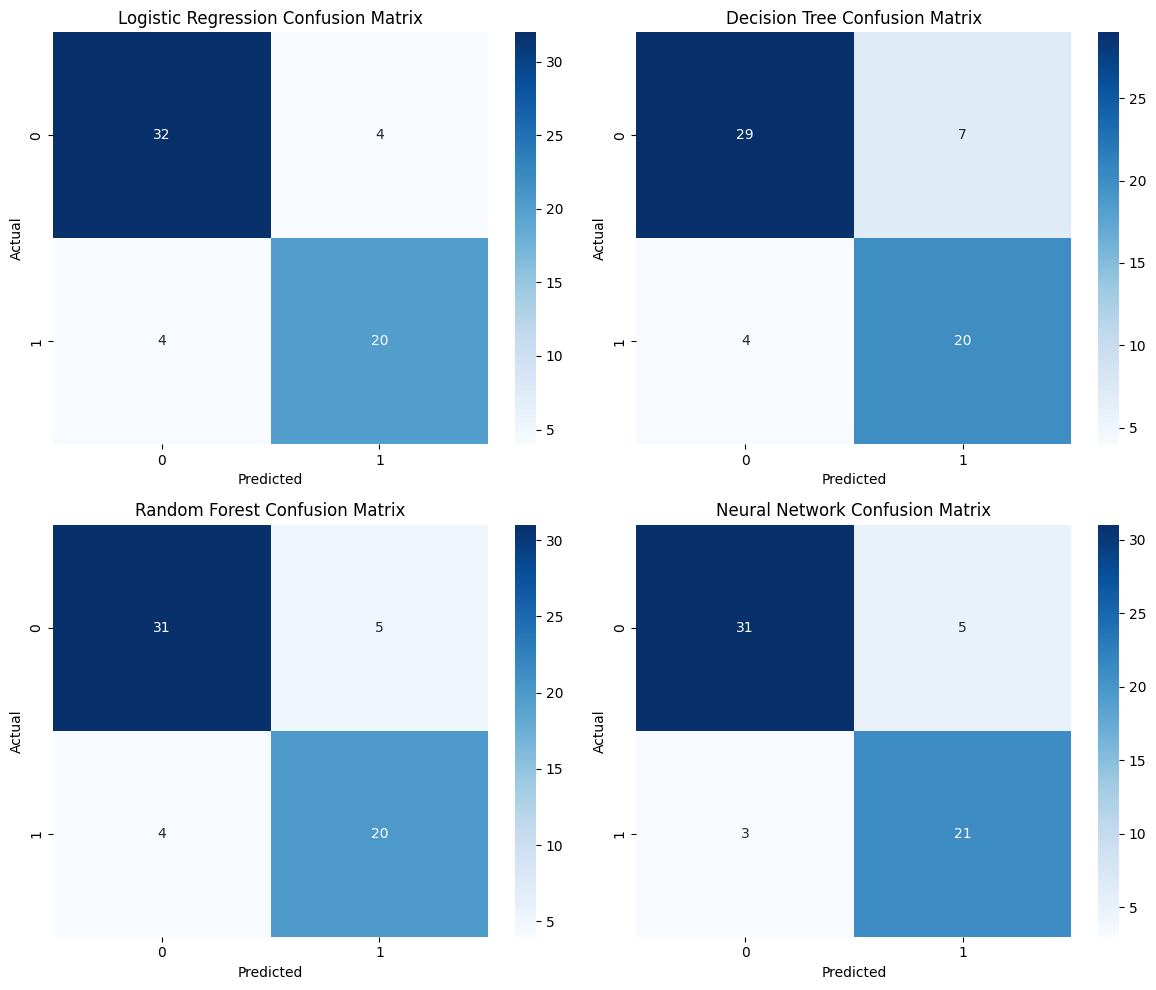

In [4]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
## Cardiovascular Disease Prediction Using Machine Learning

### Objective
Develop a predictive model for cardiovascular diseases using machine learning techniques.

### Data
Used the UCI Heart Disease dataset.

### Tools
Python (scikit-learn, pandas, matplotlib)

### Methodology
1. **Data Preprocessing**: Handled missing values, encoded categorical variables, standardized features.
2. **Model Building**: Trained Logistic Regression, Decision Tree, Random Forest, and Neural Network models.
3. **Evaluation**: Compared models based on accuracy, precision, and recall.

### Results
| Model              | Accuracy | Precision | Recall |
|--------------------|----------|-----------|--------|
| Logistic Regression| 0.87     | 0.83      | 0.83   |
| Decision Tree      | 0.82     | 0.74      | 0.83   |
| Random Forest      | 0.85     | 0.80      | 0.83   |
| Neural Network     | 0.87     | 0.81      | 0.88   |

### Conclusion
- **Logistic Regression** and **Neural Network** models achieved the highest accuracy (0.87). 
  - Logistic Regression had a precision of 0.83 and recall of 0.83.
  - Neural Network had a precision of 0.81 and recall of 0.88.
- **Random Forest** also performed well with an accuracy of 0.85, precision of 0.80, and recall of 0.83.
- **Decision Tree** had the lowest performance among the models with an accuracy of 0.82, precision of 0.74, and recall of 0.83.

### Future Work
- **Hyperparameter Tuning**: Further optimize model parameters to improve performance.
- **Feature Engineering**: Investigate additional features or transformations that could enhance prediction accuracy.
- **Ensemble Methods**: Combine multiple models for potentially better performance.
- **Cross-Validation**: Implement cross-validation techniques to ensure the robustness of the results.
- **Real-World Testing**: Validate the models on additional datasets or real-world data to confirm their generalizability.

